**SEGMENTACIÓN DE PELÍCULAS BASADAS EN SUS CARACTERÍSTICAS**

El objetivo principal de este proyecto es descubrir patrones ocultos y segmentar películas
utilizando datos históricos que abarcan información detallada de más de 5000 películas. Se
deben aplicar técnicas de Análisis Exploratorio de Datos (EDA), Análisis de Componentes
Principales (PCA) y algoritmos de clustering para descubrir las características que definen
distintos tipos de películas en la industria cinematográfica, identificando grupos o
segmentos de películas basados en atributos clave como presupuesto, ingresos,
popularidad, duración, puntuación de los usuarios y géneros. Al segmentar las películas de
esta manera, se busca entender mejor las tendencias actuales del cine, identificar qué
características están asociadas con el éxito comercial o crítico, y ofrecer recomendaciones
valiosas para productores y directores. 

Samir Esteban Gonzalez Gonzalez

Cristian Camilo Gil Grisales

Se importan las librerías necesarias, incluyendo numpy, pandas, matplotlib.pyplot, seaborn, y otras de sklearn como LabelEncoder, StandardScaler, PCA, y KMeans.

Configura la visualización en línea de gráficos y suprime las advertencias.

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

%matplotlib inline


Se define la variable data con la ruta al archivo 'Peliculas.csv' y carga los datos en un DataFrame df.

In [254]:
data = './Peliculas.csv'
df = pd.read_csv(data)

Se imprime la forma del DataFrame df, mostrando el número de filas y columnas

In [255]:
print(df.shape)

(4803, 20)


Se muestra las primeras filas de df para una revisión rápida del contenido

In [256]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


budget: el presupuesto de producción de la película, expresado en unidades monetarias (normalmente, dólares estadounidenses).

genres: una cadena de tipo JSON que describe los géneros asociados a la película (p. ej., acción, drama). Normalmente, incluye un identificador y un nombre para cada género.

homepage: el sitio web oficial de la película, si está disponible.

id: un identificador único para la película dentro del conjunto de datos.

keywords: una cadena de tipo JSON que enumera las palabras clave relacionadas con la película, cada una con un identificador y un nombre, que pueden ayudar a categorizar los temas o elementos de la película.

original_language: el idioma en el que se produjo originalmente la película (p. ej., inglés, francés).

original_title: el título original de la película tal como se estrenó.

overview: un breve resumen de la trama de la película.

popularity: un valor numérico que representa la popularidad de la película, posiblemente basado en las calificaciones de los espectadores o en métricas de interés.

production_companies: cadena de tipo JSON que enumera las empresas involucradas en la producción de la película, incluidos sus nombres e identificaciones.

production_countries: cadena de tipo JSON que indica los países donde se produjo la película.

release_date: fecha de estreno de la película, con el formato AAAA-MM-DD.

revenue: ingresos totales generados por la película, expresados ​​en unidades monetarias (normalmente dólares estadounidenses).

runtime: duración de la película en minutos.

speaking_languages: cadena de tipo JSON que enumera los idiomas que se hablan en la película, incluidos los códigos de idioma ISO y los nombres.

status: estado de estreno de la película (p. ej., estrenada, próxima).

tagline: frase corta y pegadiza que resume la esencia de la película, que suele utilizarse en marketing.

title: título de la película tal como se estrenó al público.

vote_average: calificación promedio otorgada a la película, probablemente basada en los comentarios de los espectadores.

vote_count: El número total de votos o calificaciones que ha recibido la película.

Se presenta un resumen con información general de df, como nombres de columnas, tipos de datos y valores no nulos.

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

Se muestra la cantidad de valores nulos en cada columna del DataFrame.

In [258]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

Elimina las columnas que se consideran no necesarias para el análisis ('homepage', 'tagline', 'id', 'original_title', 'overview', 'spoken_languages', 'keywords', 'status').

In [259]:
df.drop(['homepage', 'tagline', 'id', 'original_title','overview','spoken_languages','keywords','status'],axis=1, inplace=True)

Se muestra nuevamente la información general del DataFrame df para confirmar la eliminación de columnas.

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   popularity            4803 non-null   float64
 4   production_companies  4803 non-null   object 
 5   production_countries  4803 non-null   object 
 6   release_date          4802 non-null   object 
 7   revenue               4803 non-null   int64  
 8   runtime               4801 non-null   float64
 9   title                 4803 non-null   object 
 10  vote_average          4803 non-null   float64
 11  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 450.4+ KB


Se muestra las primeras filas de df para ver cómo luce después de la eliminación de columnas.

In [261]:
df.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124


Se proporciona un resumen estadístico de las columnas numéricas en df, mostrando métricas como media, desviación estándar, mínimo y máximo.

In [262]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Se muestran los valores únicos en la columna 'genres' y cuenta el total de categorías de géneros en el DataFrame.

In [263]:
print(df['genres'].unique())
len(df['genres'].unique())

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 53, "name": "Thriller"}, {"id": 27, "name": "Horror"}, {"id": 35, "name": "Comedy"}]'
 '[{"id": 10769, "name": "Foreign"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 10770, "name": "TV Movie"}]']


1175

Se cuenta la frecuencia de cada género en la columna 'genres' y muestra el total de categorías.

In [264]:
g = df["genres"].value_counts()

print("Total de categorías en Generos:{}".format(g))

Total de categorías en Generos:genres
[{"id": 18, "name": "Drama"}]                                                                     370
[{"id": 35, "name": "Comedy"}]                                                                    282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                   164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                  144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                       142
                                                                                                 ... 
[{"id": 35, "name": "Comedy"}, {"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]        1
[{"id": 16, "name": "Animation"}, {"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]        1
[{"id": 878, "name": "Science Fiction"}, {"id": 10751, "name": "Family"}]                           1
[{"id": 27, "name": "Horror"}, {"id": 18, "n

Se extraen todos los nombres de géneros únicos de cada lista de géneros en las películas. Utiliza un bucle para procesar cada entrada en la columna 'genres', limpiando cadenas de texto y tratando errores en el formato JSON.

In [265]:
unique_genres = set()
for genres_str in df['genres'].unique():
  try:
    genres_list = json.loads(genres_str.replace("'", "\""))
    for genre in genres_list:
      unique_genres.add(genre['name'])
  except (json.JSONDecodeError, AttributeError):
    print(f"Skipping invalid genres string: {genres_str}")
    continue

unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

Se realiza un conteo de las compañías de producción en la columna 'production_companies' y muestra el total de categorías en la columna.

In [266]:
g = df["production_companies"].value_counts()


print("Total de categorías en Generos:{}".format(g))

Total de categorías en Generos:production_companies
[]                                                                                                                                                                                                                                                                                             351
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                                                                                                                                       58
[{"name": "Universal Pictures", "id": 33}]                                                                                                                                                                                                                                                      45
[{"name": "New Line Cinema", "id": 12}]                                    

Se define una función extract_genre_names para extraer y limpiar nombres de géneros en una lista para cada película, y la aplica a la columna 'genres'.

In [267]:
def extract_genre_names(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except (ValueError, SyntaxError, TypeError, KeyError):
        return []

df['genres'] = df['genres'].apply(extract_genre_names)

Se define la función extract_company_names, similar a la anterior, pero para extraer nombres de compañías de producción. La aplica a la columna 'production_companies'.

In [268]:
def extract_company_names(company_str):
    try:
        companies_list = ast.literal_eval(company_str)
        return [company['name'] for company in companies_list]
    except (ValueError, SyntaxError, TypeError, KeyError):
        return []

df['production_companies'] = df['production_companies'].apply(extract_company_names)

Se crea una función extract_country_names para obtener nombres de países en la columna 'production_countries' y la aplica a esta columna, limpiando y formateando los datos.

In [269]:
def extract_country_names(country_str):
    try:
        country_list = ast.literal_eval(country_str)
        return [country['name'] for country in country_list]
    except (ValueError, SyntaxError, TypeError, KeyError):
        return []

df['production_countries'] = df['production_countries'].apply(extract_country_names)

Se convierte la columna 'release_date' al formato de fecha de pandas y extrae solo la parte de la fecha sin la hora.

In [270]:
df["release_date"] = pd.to_datetime(df["release_date"])
fechas = []
for i in df["release_date"]:
    i = i.date()
    fechas.append(i)  

Se usa LabelEncoder de sklearn para transformar la columna 'original_language' en valores numéricos, permitiendo el uso de estos datos en modelos de análisis.

In [271]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

categorical_columns_to_normalize = ['original_language']

for column in categorical_columns_to_normalize:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])


Se eliminan las filas con valores nulos restantes y muestra la cantidad de registros en el DataFrame después de esta limpieza.

In [272]:
df = df.dropna()
print("Cantidad de registros actualizada a: {}".format(len(df)))

Cantidad de registros actualizada a: 4800


Se muestran las primeras filas del DataFrame para verificar los cambios tras las modificaciones.

In [273]:
df.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",7,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",7,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",7,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",7,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",7,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,John Carter,6.1,2124


Se proporciona un resumen de la estructura actual del DataFrame, tras la eliminación de filas y columnas irrelevantes.

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   original_language     4800 non-null   int64         
 3   popularity            4800 non-null   float64       
 4   production_companies  4800 non-null   object        
 5   production_countries  4800 non-null   object        
 6   release_date          4800 non-null   datetime64[ns]
 7   revenue               4800 non-null   int64         
 8   runtime               4800 non-null   float64       
 9   title                 4800 non-null   object        
 10  vote_average          4800 non-null   float64       
 11  vote_count            4800 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 487.5+ KB


Se generan histogramas para analizar la distribución de las variables numéricas: 'budget', 'revenue', 'runtime', y 'popularity'. Utiliza seaborn para visualizar la distribución de cada variable.

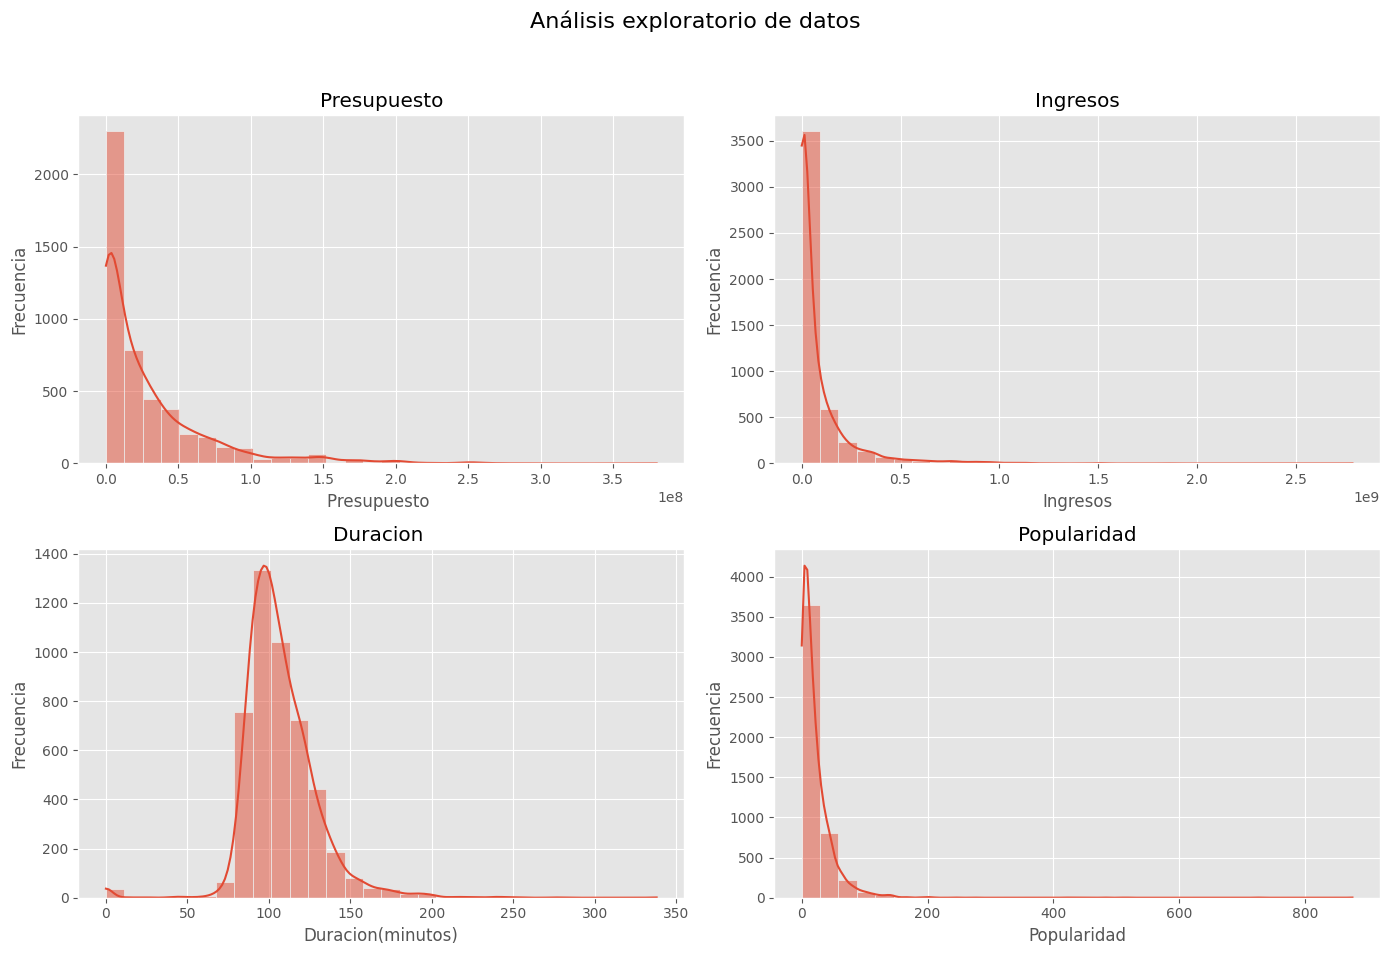

In [275]:
# Set up the plotting style for consistency
plt.style.use('ggplot')

# Plot histograms for budget, revenue, runtime, and popularity to examine distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis exploratorio de datos', fontsize=16)

# Budget histogram
sns.histplot(df['budget'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Presupuesto')
axes[0, 0].set_xlabel('Presupuesto ')
axes[0, 0].set_ylabel('Frecuencia')

# Revenue histogram
sns.histplot(df['revenue'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Ingresos')
axes[0, 1].set_xlabel('Ingresos')
axes[0, 1].set_ylabel('Frecuencia')

# Runtime histogram
sns.histplot(df['runtime'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Duracion ')
axes[1, 0].set_xlabel('Duracion(minutos)')
axes[1, 0].set_ylabel('Frecuencia')

# Popularity histogram
sns.histplot(df['popularity'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Popularidad')
axes[1, 1].set_xlabel('Popularidad')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Se crean gráficos de dispersión para explorar las relaciones entre 'budget' y 'revenue', así como entre 'runtime' y 'popularity', mostrando posibles correlaciones entre estas variables.

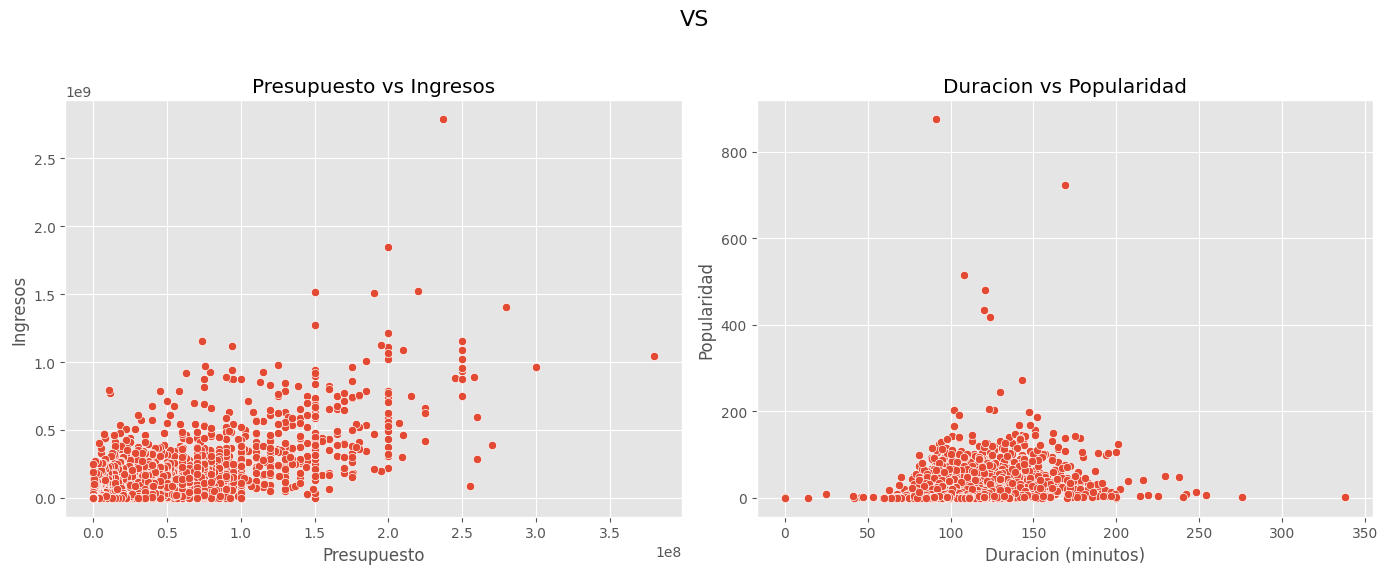

In [276]:
# Scatter plots for key relationships between budget-revenue and runtime-popularity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('VS', fontsize=16)

# Scatter plot: Budget vs Revenue
sns.scatterplot(x='budget', y='revenue', data=df, ax=axes[0])
axes[0].set_title('Presupuesto vs Ingresos')
axes[0].set_xlabel('Presupuesto')
axes[0].set_ylabel('Ingresos')

# Scatter plot: Runtime vs Popularity
sns.scatterplot(x='runtime', y='popularity', data=df, ax=axes[1])
axes[1].set_title('Duracion vs Popularidad')
axes[1].set_xlabel('Duracion (minutos)')
axes[1].set_ylabel('Popularidad')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Comenzaremos por utilizar algo de lo que normalizamos con generos de pelicula, productoras y paises productores para revisar que tan util fue dividirlos y asi tener un valor mas estimado para el estudio.

Aqui tenemos el promedio de popularidad por cada genero de peliculas basado en la cantidad de peliculas, permitira revisar cuales son los generos mas populares.

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4800, dtype: object


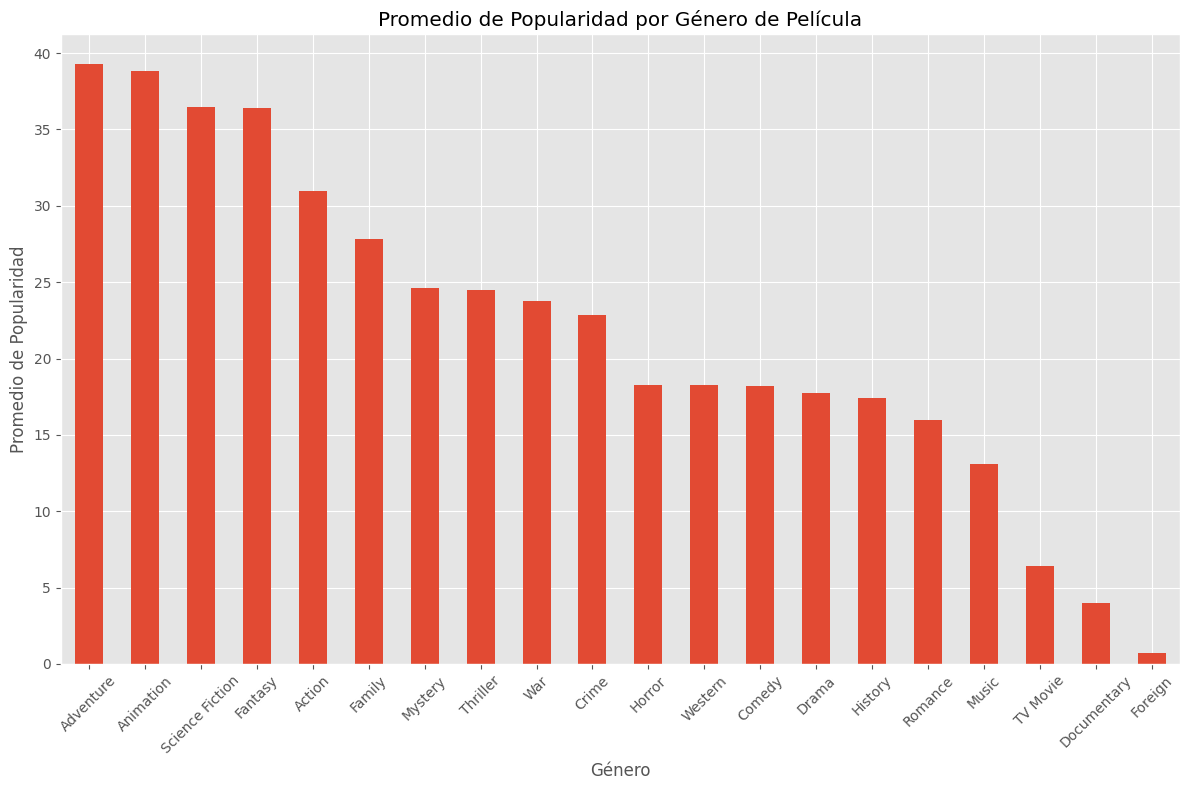

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Expandir cada género a una fila separada para promediar la popularidad por género
exploded_genres_data = df.explode('genres')

# Calcular el promedio de popularidad por género
average_popularity_by_genre = exploded_genres_data.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Crear el gráfico
plt.figure(figsize=(12, 8))
average_popularity_by_genre.plot(kind='bar', title='Promedio de Popularidad por Género de Película')
plt.xlabel('Género')
plt.ylabel('Promedio de Popularidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Aqui aplicamos lo mismo que arriba pero ahora directamente a las productoras para saber cuales son las que tienen un mayor promedio de popularidad pero en este caso las 10 mejores por puntajes:

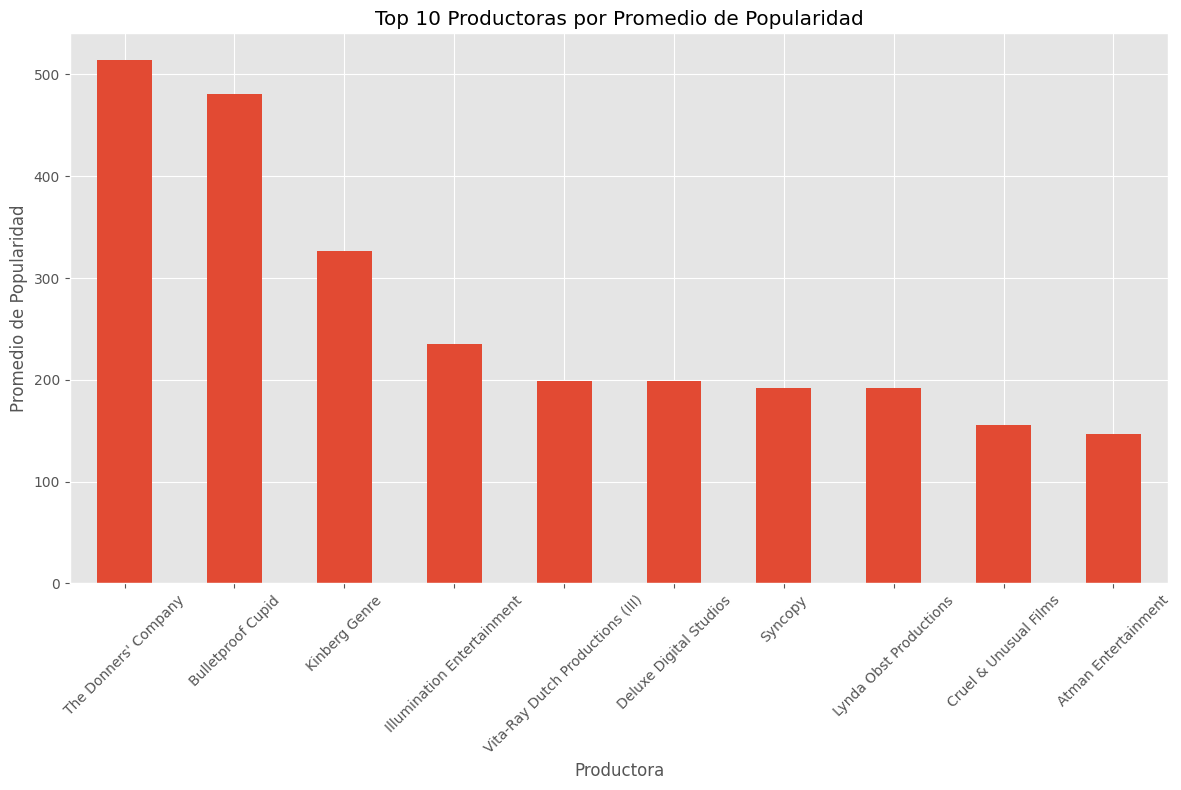

In [279]:
# Expandir cada productora a una fila separada para promediar la popularidad por productora
exploded_companies_data = df.explode('production_companies')

# Calcular el promedio de popularidad por productora y seleccionar las 10 mejores
average_popularity_by_company = exploded_companies_data.groupby('production_companies')['popularity'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
average_popularity_by_company.plot(kind='bar', title='Top 10 Productoras por Promedio de Popularidad')
plt.xlabel('Productora')
plt.ylabel('Promedio de Popularidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este caso queremos revisar cuantas peliculas hay por cada genero, no necesariamente tienen que ser solo de ese genero si no que sean parte del grupo de esas.

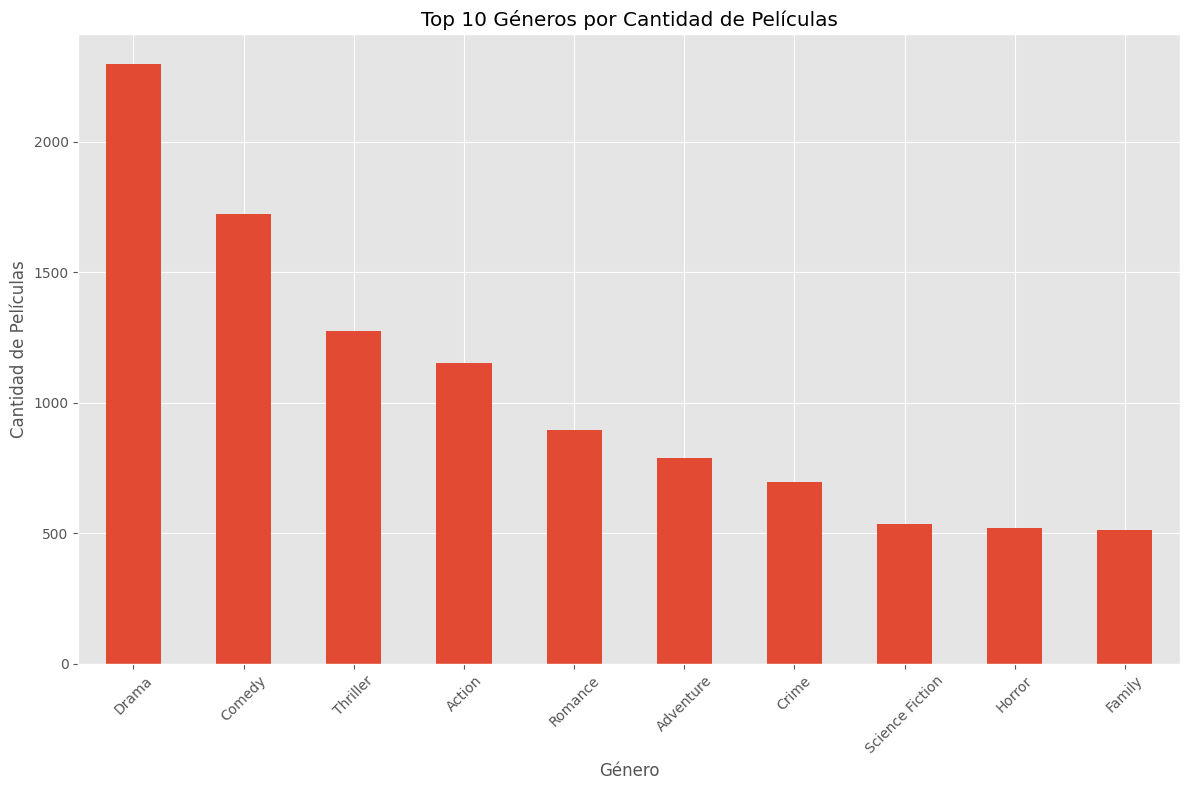

In [280]:
# Expandir cada género a una fila separada
exploded_genres_data = df.explode('genres')

# Contar la cantidad de películas por género y seleccionar los 10 principales
top_genres_by_count = exploded_genres_data['genres'].value_counts().head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
top_genres_by_count.plot(kind='bar', title='Top 10 Géneros por Cantidad de Películas')
plt.xlabel('Género')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui vimos las 10 productoras que hacen mas peliculas o al menos participan en ellas.

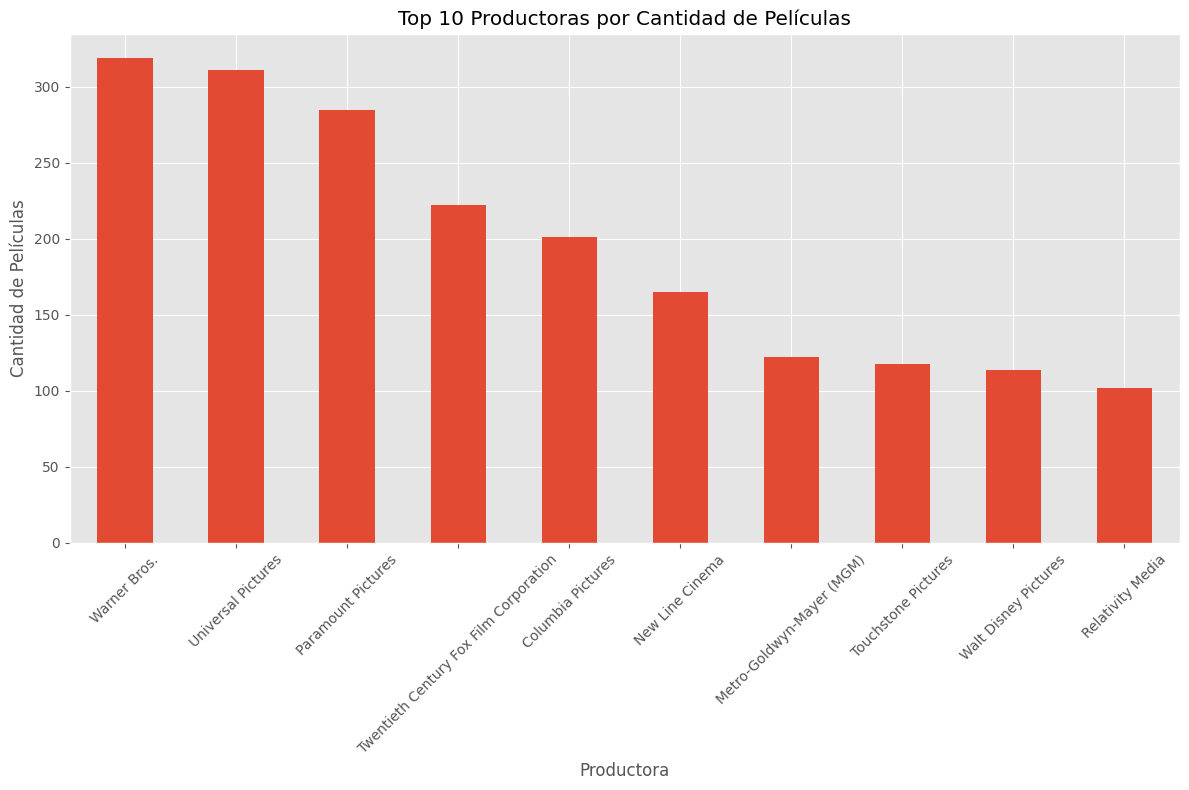

In [281]:
exploded_companies_data = df.explode('production_companies')

# Contar la cantidad de películas por productora y seleccionar las 10 principales
top_companies_by_count = exploded_companies_data['production_companies'].value_counts().head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
top_companies_by_count.plot(kind='bar', title='Top 10 Productoras por Cantidad de Películas')
plt.xlabel('Productora')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Aqui cual pais es el que produce mas peliculas exactamente otra comparativa que permite explorar mejor el mercado

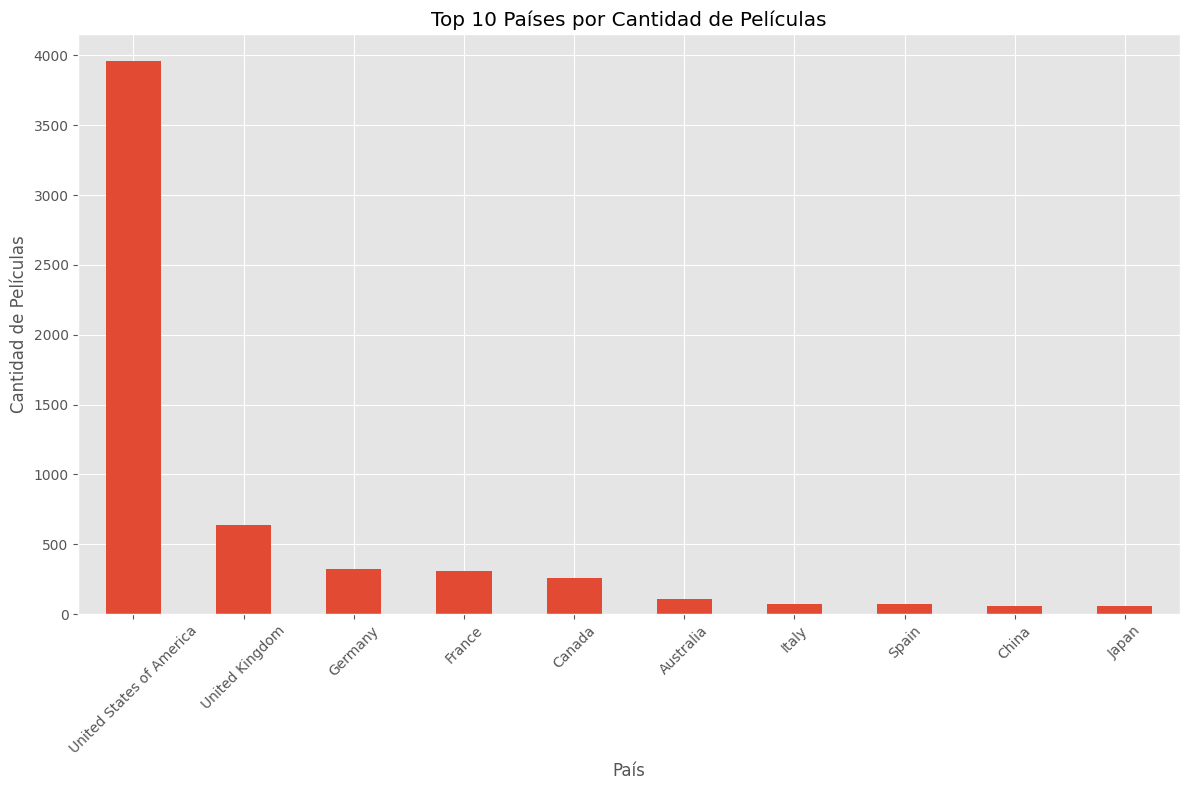

In [282]:
# Expandir cada país de producción a una fila separada
exploded_countries_data = df.explode('production_countries')

# Contar la cantidad de películas por país de producción y seleccionar los 10 principales
top_countries_by_count = exploded_countries_data['production_countries'].value_counts().head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
top_countries_by_count.plot(kind='bar', title='Top 10 Países por Cantidad de Películas')
plt.xlabel('País')
plt.ylabel('Cantidad de Películas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este es el promedio por pais productor de peliculas, aunque realmente no es tan util porque si solo tiene una pelicula de 140 entonces queda tal que asi pero vale la pena verlo.

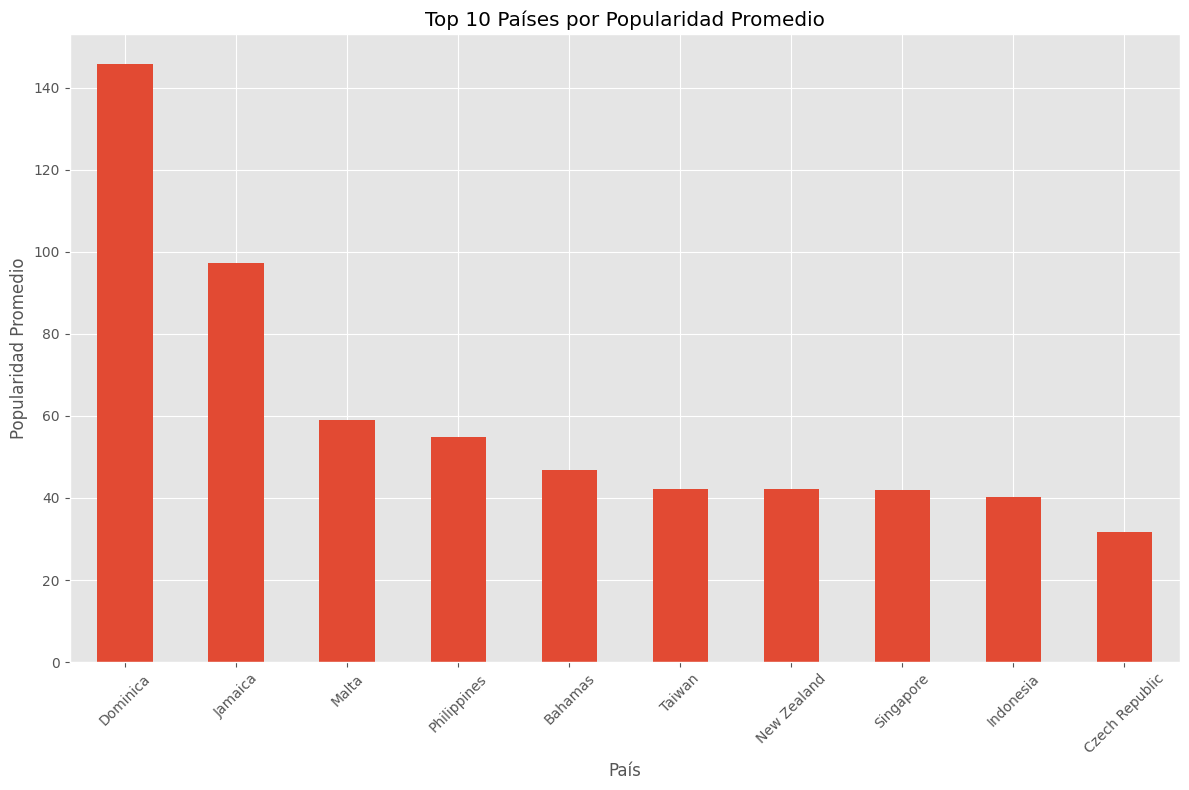

In [283]:
# Calcular el promedio de popularidad por país de producción y seleccionar los 10 principales
average_popularity_by_country = exploded_countries_data.groupby('production_countries')['popularity'].mean().sort_values(ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(12, 8))
average_popularity_by_country.plot(kind='bar', title='Top 10 Países por Popularidad Promedio')
plt.xlabel('País')
plt.ylabel('Popularidad Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se calcula y visualiza una matriz de correlación para las variables numéricas principales del DataFrame ('budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count'), utilizando un mapa de calor (heatmap) para observar la intensidad y dirección de las relaciones entre las variables.

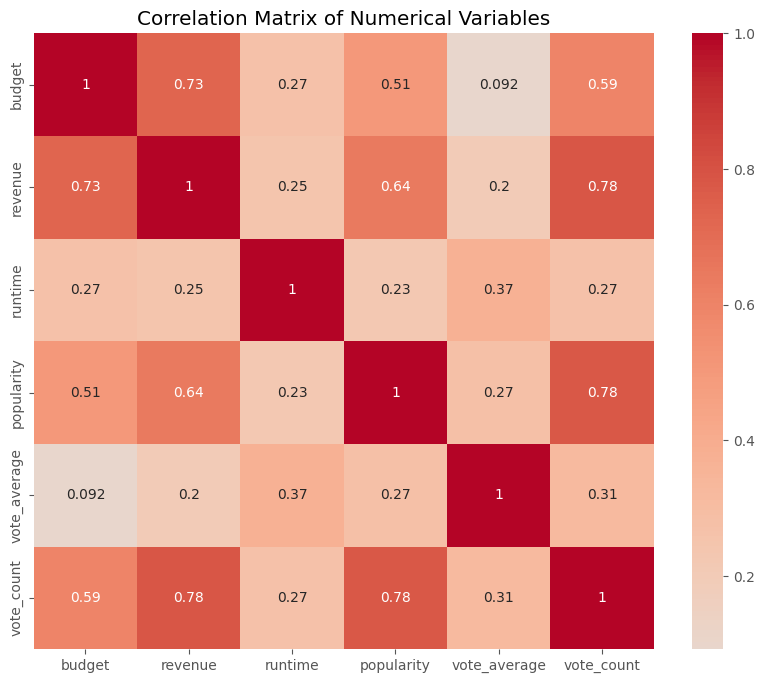

In [ ]:
# Correlation matrix for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']].corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [ ]:
df.dropna()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",7,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",7,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[Action, Adventure, Crime]",7,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[Action, Crime, Drama, Thriller]",7,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[Action, Adventure, Science Fiction]",7,43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",8,14.269792,[Columbia Pictures],"[Mexico, United States of America]",1992-09-04,2040920,81.0,El Mariachi,6.6,238
4799,9000,"[Comedy, Romance]",7,0.642552,[],[],2011-12-26,0,85.0,Newlyweds,5.9,5
4800,0,"[Comedy, Drama, Romance, TV Movie]",7,1.444476,"[Front Street Pictures, Muse Entertainment Ent...",[United States of America],2013-10-13,0,120.0,"Signed, Sealed, Delivered",7.0,6
4801,0,[],7,0.857008,[],"[United States of America, China]",2012-05-03,0,98.0,Shanghai Calling,5.7,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4800 non-null   int64         
 1   genres                4800 non-null   object        
 2   original_language     4800 non-null   int64         
 3   popularity            4800 non-null   float64       
 4   production_companies  4800 non-null   object        
 5   production_countries  4800 non-null   object        
 6   release_date          4800 non-null   datetime64[ns]
 7   revenue               4800 non-null   int64         
 8   runtime               4800 non-null   float64       
 9   title                 4800 non-null   object        
 10  vote_average          4800 non-null   float64       
 11  vote_count            4800 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 487.5+ KB


Primero, se realiza una copia de los datos originales y se eliminan algunas columnas irrelevantes para el PCA, como el título, compañías de producción, países de producción, fecha de lanzamiento y géneros. Esto se hace para enfocarse en las variables numéricas que PCA puede analizar más efectivamente.

Luego, se usa StandardScaler para estandarizar las características numéricas. Este paso es crucial en PCA porque la estandarización garantiza que todas las variables contribuyan de manera equitativa al análisis, eliminando efectos de escala (por ejemplo, si una variable tiene un rango mucho mayor que otras).

In [ ]:
#Crear una copia de los datos
ds = df.copy()

cols_del = ['title', 'production_companies', 'production_countries', 'release_date', 'genres']	
ds = ds.drop(cols_del, axis=1)

#Escalar la data
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("Todas las características estan estandarizadas")

Todas las características estan estandarizadas


Se hace una visualizacion de la nueva tabla con los datos estandarizados

In [ ]:
scaled_ds.head()

,budget,original_language,popularity,revenue,runtime,vote_average,vote_count
0,5.105821,-0.155275,4.052064,16.611528,2.442541,0.930401,8.997440
1,6.652742,-0.155275,3.695201,5.394760,2.752835,0.677927,3.085186
2,5.302256,-0.155275,2.698753,4.901597,1.821953,0.172980,3.057650
3,5.425027,-0.155275,2.853887,6.155692,2.575524,1.267033,6.815575
4,5.670570,-0.155275,0.704659,1.239130,1.112709,0.004664,1.160869


La primera llamada a PCA().fit(scaled_ds) calcula el PCA para todas las componentes posibles. Los valores propios (eigenvalues) obtenidos reflejan la importancia de cada componente en términos de la varianza explicada.
Luego, se cuenta cuántas componentes tienen valores propios mayores que 1, almacenándolos en componentes. Este valor ayuda a determinar cuántas componentes principales son necesarias para capturar una proporción significativa de la varianza en los datos.

pca.explained_variance_ratio_ proporciona la proporción de la varianza total explicada por cada componente principal. Esto ayuda a evaluar qué cantidad de información de los datos originales se retiene en las primeras componentes.

In [ ]:
pca = PCA().fit(scaled_ds)
eigenvalues = pca.explained_variance_
componentes = np.sum(eigenvalues > 1)
print(componentes)
varianzas_explicativas = pca.explained_variance_ratio_
print("Las varianzas explicativas de los coponentes son: {}".format(varianzas_explicativas))

2
Las varianzas explicativas de los coponentes son: [0.46683646 0.17232408 0.13461659 0.10167974 0.06487613 0.0368318
 0.0228352 ]


Con el número óptimo de componentes encontrado anteriormente, PCA(n_components=componentes) se aplica para reducir la dimensionalidad de los datos a estas componentes.

Los datos transformados se almacenan en un nuevo DataFrame (PCA_ds), que contiene sólo las columnas principales (llamadas aquí "col1" y "col2") y representa una versión comprimida de los datos originales con menos dimensiones.

In [ ]:
pca = PCA(n_components=componentes)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe()

,col1,col2
count,4800.000000,4.800000e+03
mean,0.000000,-1.184238e-17
std,1.807909,1.098417e+00
min,-3.519599,-5.512283e+00
25%,-1.031010,-5.814457e-01
50%,-0.510537,-3.754903e-02
75%,0.437115,5.032815e-01
max,18.560598,6.284064e+00


Se implementa el método del codo para encontrar el número óptimo de clústeres en K-Means, generando un gráfico que muestra la inercia (suma de distancias internas) en función del número de clústeres.

  File "C:\Users\samir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


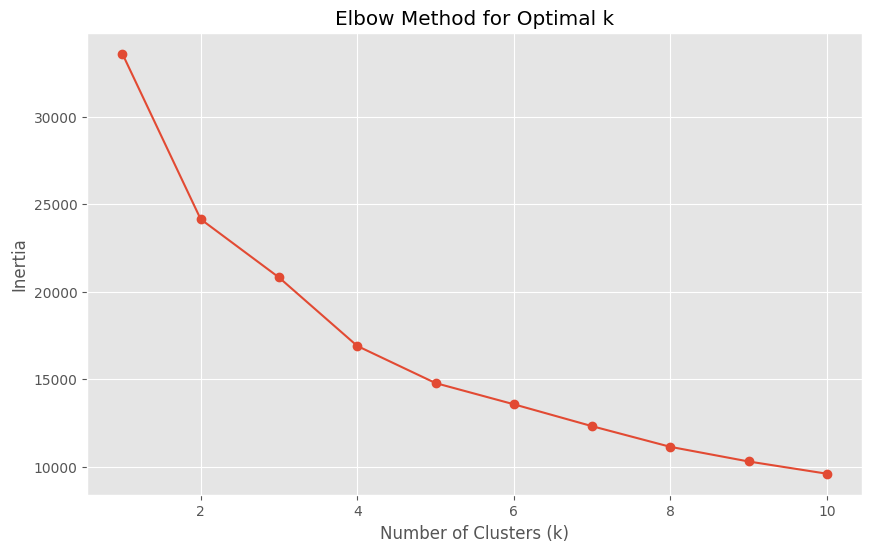

In [ ]:
# Define the range of cluster numbers to test
k_range = range(1, 11)
inertia = []

# Calculate inertia for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_ds)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


Implementa el método del codo para encontrar el número óptimo de clústeres en K-Means, generando un gráfico que muestra la inercia (suma de distancias internas) en función del número de clústeres.

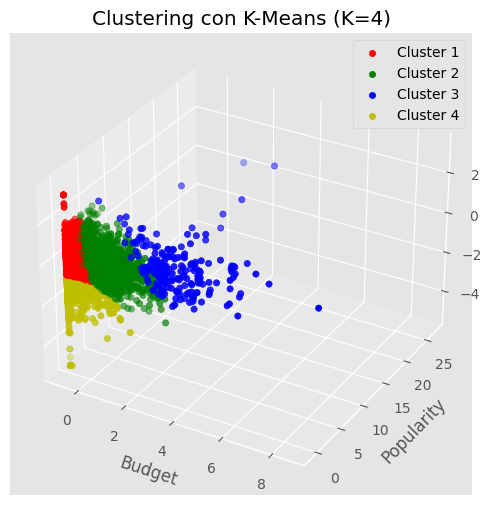

In [ ]:
X_sel = scaled_ds[['budget', 'popularity', 'vote_average']]

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_sel)

# Retrieve labels and assign colors for each cluster
labels = kmeans.labels_
colors = ['r', 'g', 'b', 'y']

# Plotting in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in the scatter plot with its corresponding color
for i in range(4):
    ax.scatter(
        X_sel.values[labels == i, 0],
        X_sel.values[labels == i, 1],
        X_sel.values[labels == i, 2],
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# Setting plot labels and title
ax.set_title('Clustering con K-Means (K=4)')
ax.set_xlabel('Budget')
ax.set_ylabel('Popularity')
ax.set_zlabel('Vote Average')
ax.legend()
plt.show()


Selecciona 'runtime' y 'popularity' para un análisis en 2D de los clústeres.

Aplica K-Means con 4 clústeres y grafica en 2D, etiquetando cada clúster en colores distintos.

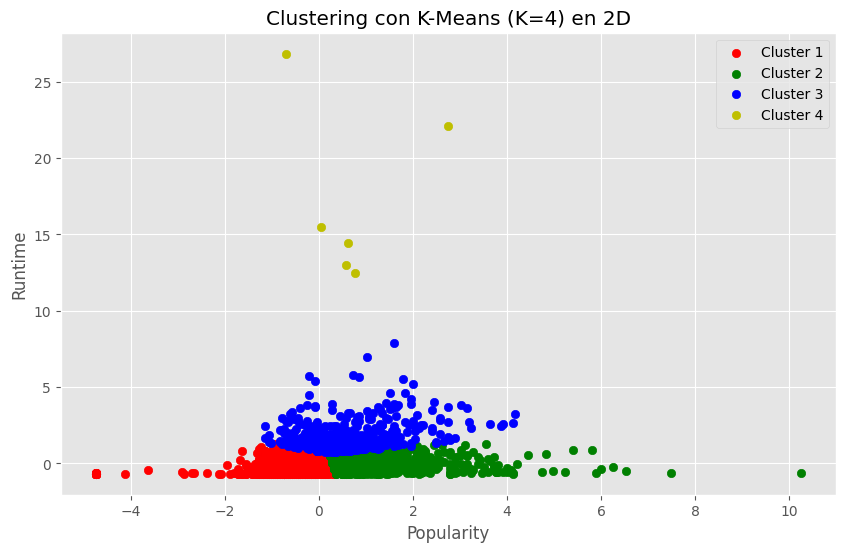

In [ ]:
# Selecting 'popularity' and 'runtime' for a 2D clustering visualization
X_sel_2d = scaled_ds[['runtime', 'popularity']]

# Apply KMeans with 4 clusters again on this 2D subset
kmeans_2d = KMeans(n_clusters=4, random_state=0)
kmeans_2d.fit(X_sel_2d)

# Retrieve labels for each cluster in 2D
labels_2d = kmeans_2d.labels_


plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(
        X_sel_2d.values[labels_2d == i, 0],
        X_sel_2d.values[labels_2d == i, 1],
        c=colors[i],
        label=f'Cluster {i+1}'
    )

# Setting plot labels and title
plt.title('Clustering con K-Means (K=4) en 2D')
plt.xlabel('Popularity')
plt.ylabel('Runtime')
plt.legend()
plt.show()

